This is an example usage of a fully connected neural network constructed solely with components of this machine learning library project.
 
A neural network with plain batch gradient descent will be used to tackle the classic MNIST number classification problem. With this simple approach, a classification accuracy of 82.2% was achieved.

In [1]:
# Importing features of this machine learning library
from nn.BaseModel import BaseModel
from nn.layers import Linear
from nn.activations import Sigmoid, ReLu
from nn.loss_functions import BCE_loss
from nn.optimizers import GDOptimizer
from utils.preprocessing import train_test_split

# Importin other libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

Defining the neural network.

In [2]:
class MLP(BaseModel):
    def __init__(self, in_features, hidden_size1, hidden_size2, out_features):
        super().__init__()

        self.fc1 = Linear(in_features, hidden_size1)
        self.fc2 = Linear(hidden_size1, hidden_size2)
        self.fc3 = Linear(hidden_size2, out_features)
        self.activation_1 = ReLu()
        self.activation_2 = ReLu()
        self.activation_3 = Sigmoid()

        self.add_layer(self.fc1)
        self.add_layer(self.fc2)
        self.add_layer(self.fc3)
        
    def forward(self, x):
        x = self.fc1.forward(x)
        x = self.activation_1.forward(x)
        
        x = self.fc2.forward(x)
        x = self.activation_2.forward(x)
        
        x = self.fc3.forward(x)
        x = self.activation_3.forward(x)
        return x

    def backward(self, dy):
        dx = self.fc3.backward(dy)
        
        dx = self.activation_2.backward(dx)
        dx = self.fc2.backward(dx)
        
        dx = self.activation_1.backward(dx)
        dx = self.fc1.backward(dx)
        return dy

Downloading the MNIST dataset.

In [3]:
# Download the data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Normalize the images (28x28) to [0, 1]
X = X / 255

# Convert the labels to integers
y = y.astype(int)

# Convert the data into numpy arrays
X = np.array(X)
y = np.array(y)

In [4]:
# Convert y to target classes
y_new = np.zeros((y.shape[0], 10))
for i, target in enumerate(y):
    y_new[i, target] = 1
y = y_new

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


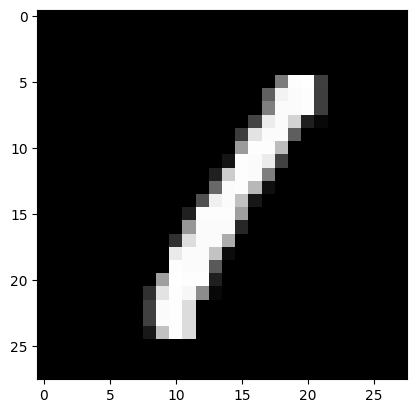

In [11]:
# Sanity check
image = 3
x_sample = X[image].reshape(28, 28)
y_sample = y[image]

print(y_sample)
plt.imshow(x_sample, 'gray')

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Define the batch size and reshape the data accordingly
batch_size = 64
X_train = X_train.reshape(-1, batch_size, 784)
y_train = y_train.reshape(-1, batch_size, 10)
print(X_train.shape)
print(y_train.shape)

(875, 64, 784)
(875, 64, 10)


Train the neural network.

In [ ]:
learning_rate = 0.00005

mlp = MLP(784, 258, 128, 10)
loss_fn = BCE_loss()
optimizer = GDOptimizer(mlp, learning_rate)

# Training loop
epochs = 150
train_loss = []
num_batches = X_train.shape[0]

for epoch in range(epochs):
    epoch_loss = []
    for X_batch, y_batch in zip(X_train, y_train):

        y_pred = mlp.forward(X_batch)
        loss = loss_fn.forward(y_pred, y_batch)
        epoch_loss.append(loss)

        dy = loss_fn.backward()
        mlp.backward(dy)

        optimizer.update()

    train_loss.append(sum(epoch_loss)/num_batches)
    # print("Epoch", epoch, "loss: ", train_loss[-1])

    # Early stopping, a rough cutoff value determined by observing the loss values
    if epoch > 3 and train_loss[epoch - 3] < train_loss[epoch] or train_loss[epoch] < 0.116:
        print("Early stopping")
        break

Evaluating the model.

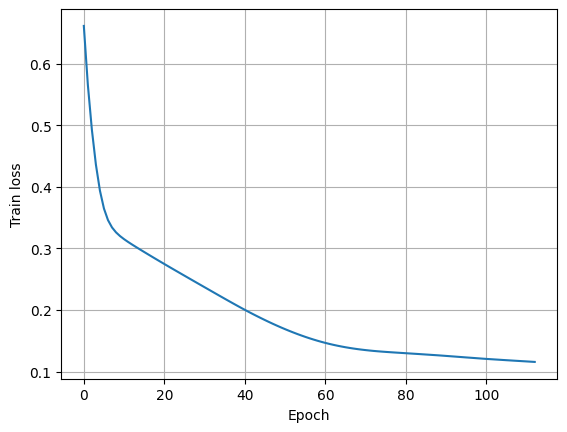

In [39]:
# Plot the train loss
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.grid(True)

In [40]:
pred = mlp.forward(X_test)

# Calculate the accuracy
correct = 0
for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        correct += 1
accuracy = correct / len(pred)
print("Accuracy: %.3f" % accuracy)

Accuracy: 0.822


An accuracy of 0.822 on the test set for the MNIST number classification problem was achieved.